# SI 618: Classification

## Objectives:
- Be able to perform classifications using the following methods and interpret their results.
  - Naive Bayes
  - Decision Tree
  - Random Forest
  
Note: some slides from Eytan Adar and Kevyn Collins-Thompson


### <font color="red">NOTE: use conda to install the ```pydotplus``` and ```graphviz``` packages</font>

![](resources/classification/Slide02.png)

![](resources/classification/Slide03.png)

![](resources/classification/Slide04.png)

![](resources/classification/Slide05.png)

![](resources/classification/Slide06.png)

![](resources/classification/Slide07.png)

![](resources/classification/Slide08.png)

![](resources/classification/Slide09.png)

![](resources/classification/Slide10.png)

![](resources/classification/Slide11.png)

![](resources/classification/Slide12.png)

![](resources/classification/Slide13.png)

![](resources/classification/Slide14.png)

![](resources/classification/Slide15.png)

![](resources/classification/Slide16.png)

![](resources/classification/Slide17.png)

![](resources/classification/Slide18.png)

![](resources/classification/Slide19.png)

![](resources/classification/Slide20.png)

![](resources/classification/Slide21.png)

![](resources/classification/Slide22.png)

![](resources/classification/Slide23.png)

![](resources/classification/Slide24.png)

![](resources/classification/Slide25.png)

![](resources/classification/Slide26.png)

![](resources/classification/Slide27.png)

![](resources/classification/Slide28.png)

![](resources/classification/Slide30.png)

![](resources/classification/Slide31.png)

![](resources/classification/Slide32.png)

![](resources/classification/Slide33.png)

![](resources/classification/Slide34.png)

![](resources/classification/Slide35.png)

![](resources/classification/Slide36.png)

![](resources/classification/Slide37.png)

![](resources/classification/Slide38.png)

![](resources/classification/Slide39.png)

![](resources/classification/Slide40.png)

![](resources/classification/Slide41.png)

![](resources/classification/Slide42.png)

![](resources/classification/Slide43.png)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os


In [3]:
# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the iris dataset
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Split the data set into training and testing subsets using a scikit_learn function:

In [5]:
df_iris_train,df_iris_test = train_test_split(df_iris, test_size=0.3)

In [6]:
len(df_iris_train),len(df_iris_test)

(105, 45)

# 1. Decision Trees

## 1.1 Train a decision tree classifier

We will train a decision tree classifier to classify iris species. Here are the specifications:
- __Objective__: predict which species an iris instance belongs to.
- __Possible classes__: "setosa", "versicolor", and "virginica"
- __Features__: all four features


In [10]:
## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(max_depth=2,
                                         criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

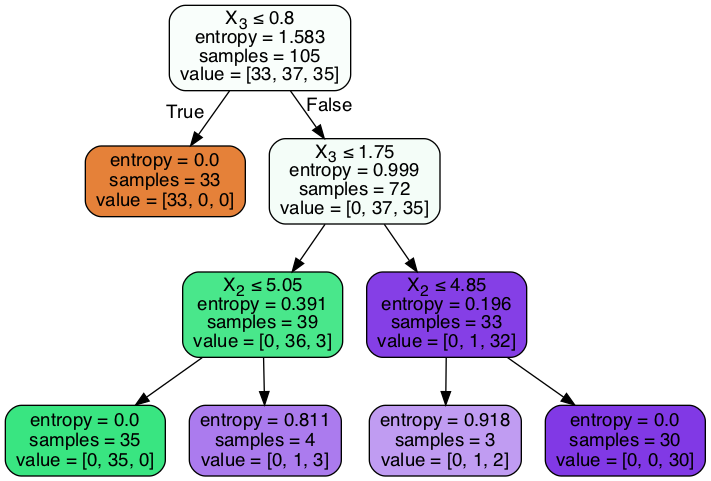

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

To interpret the above plot, please read through the following paragraphs quoted from http://www.thegrimmscientist.com/tutorial-decision-trees/, which has slightly different results than our data set because they used alightly different data.  Their results looks like:
![](http://www.thegrimmscientist.com/content/images/2017/06/TreeDepth1.png)
> This image needs a bit of explanation. The top node represents the whole dataset. The whole dataset has 150 samples, as seen in the third line of that first node. We'll explain entropy more later, but for now, think of it as a formalization of the amount of uncertainty in the data. The first line on the top node gives us the decision our tree magically found. When that decision "petal width is less than or equal to 0.80 cm" is true for a given sample, that sample is assigned to the bottom left node. When it is false, the sample is assigned to the bottom right node.

>On these two leaf nodes, the number of samples is shown on the second line. The number of samples broken down by class is on the third line. On the left leaf node, all 50 of the samples in class 1 and none from the other two classes are represented. Given the decision and the data at hand, we are certain to have a sample in class 1 (setosa). Since we are totally certain about that, uncertainty (entropy) is 0.

>When our petal width <= 0.80 decider is false, the given sample is assigned to the right node. It works out that all 50 samples from class 2 (versicolor) and all 50 samples from class 3 (virginica) are assigned to this right leaf. Thus, when we're at this leaf given the decision, we're evenly unsure whether we're in class 2 or class 3. The amount of uncertainty this works out to be is 1.0. Again, we'll explain the math and meaning behind that later.

### <font color="magenta">Question 1:</font>
1. Train a decision tree with `max_depth=2`. Plot it, if you have graphviz installed, as a graph (same below).
2. Train a decision tree with `max_depth=3`.
3. Train a decision tree without `max_depth` limitation.


_NOTE_: see http://www.thegrimmscientist.com/tutorial-decision-trees/ for awesome visualizations and explanations to intuitively understand what decision tree algorithm is doing.

In [16]:
## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(max_depth=3,
                                         criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

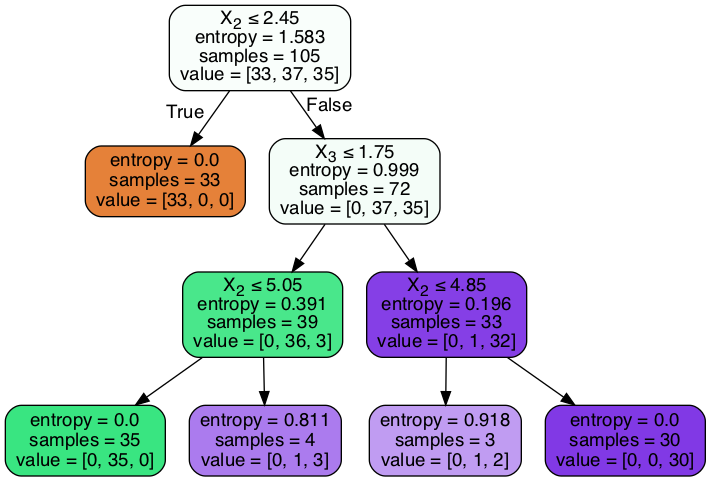

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

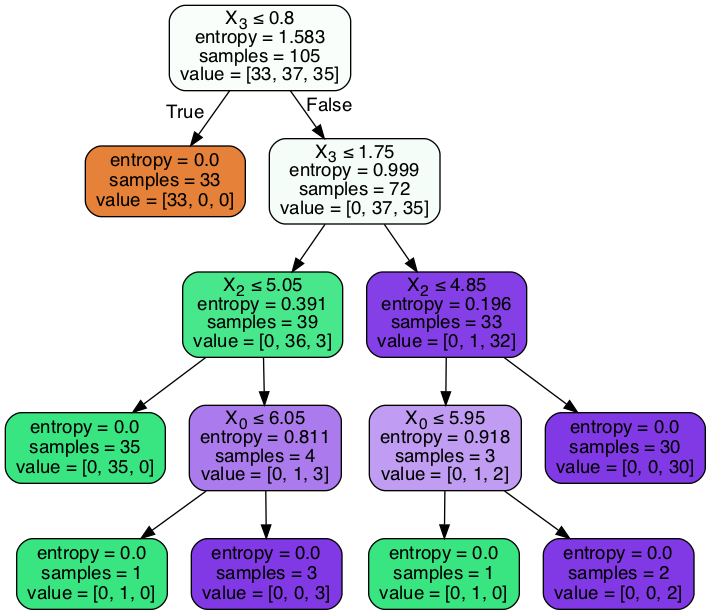

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 1.2 Deploying a Decision Tree Classifier

We train a decision tree with `max_depth=2` to cluster the irises into three species.

<font color ="red">Now use your newly created function to call max_depth=2, max_depth=3 and no limit on max_depth.  Examine the differences using comparePlot (below)

In [20]:
# first train the model with max_depth = 2 (similar to the training your did above)

## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(max_depth=2,
                                         criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# this is testing the model 
predicted_labels = dt_model.predict(df_iris_test.ix[:,:4])
df_iris_test['predicted_label_tree'] = predicted_labels
df_iris_test.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_label_tree
87,6.3,2.3,4.4,1.3,versicolor,versicolor
40,5.0,3.5,1.3,0.3,setosa,setosa
103,6.3,2.9,5.6,1.8,virginica,virginica
28,5.2,3.4,1.4,0.2,setosa,setosa
99,5.7,2.8,4.1,1.3,versicolor,versicolor
143,6.8,3.2,5.9,2.3,virginica,virginica
112,6.8,3.0,5.5,2.1,virginica,virginica
116,6.5,3.0,5.5,1.8,virginica,virginica
14,5.8,4.0,1.2,0.2,setosa,setosa
82,5.8,2.7,3.9,1.2,versicolor,versicolor


In [22]:
# utility class to compare the predictions versus ground truth
def comparePlot(input_frame,real_column,predicted_column):
    df_a = input_frame.copy()
    df_b = input_frame.copy()
    df_a['label_source'] = 'Species'
    df_b['label_source'] = 'Classifier'
    df_a['label'] = df_a[real_column]
    df_b['label'] = df_b[predicted_column].apply(lambda x: 'Predict %s'%x)
    df_c = pd.concat((df_a, df_b), axis=0, ignore_index=True)
    sns.lmplot(x='sepal_length', y='sepal_width', col='label_source',
               hue='label', data=df_c, fit_reg=False, size=4);

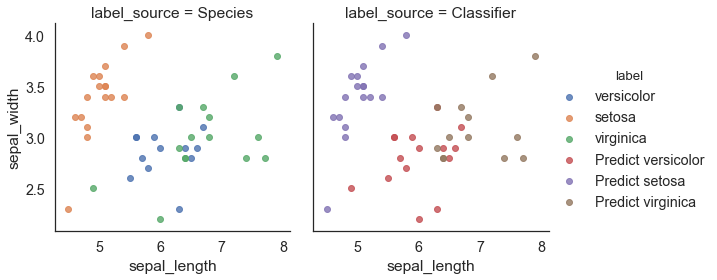

In [23]:
# see the difference
comparePlot(df_iris_test,"species","predicted_label_tree")

### <font color="magenta">Question 2: Now repeat the above steps with max_depth=3 and no limit on max_depth

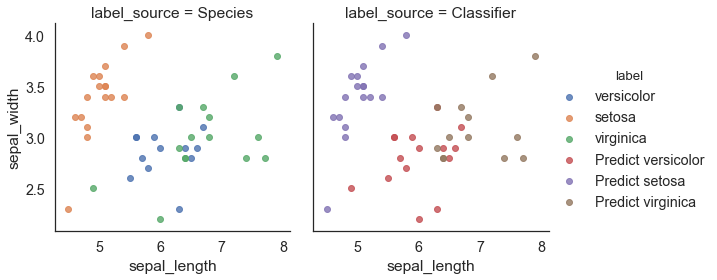

In [24]:
## Build and train the classifier
dt_model = sktree.DecisionTreeClassifier(max_depth=3,
                                         criterion='entropy')
# given first 4 columns, learn the species
dt_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

predicted_labels = dt_model.predict(df_iris_test.ix[:,:4])
df_iris_test['predicted_label_tree'] = predicted_labels

comparePlot(df_iris_test,"species","predicted_label_tree")

# 2. Random Forest

Let's build a random forest classifier to classify irises into three species.
- __Objective__: predict which species an iris instance belongs to.
- __Possible classes__: "setosa", "versicolor", and "virginica"
- __Features__: all four features

In [33]:
# build a random forest
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')
rf_model.fit(df_iris_train.ix[:,:4],df_iris_train.species)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

<font color="red">Use the same approach that you did in predicting the Decision Tree Classifier.  Note that you don't need to use .sample()

In [34]:
# now do the predicting... use the same approach as you did in testing the Decision Tree Classifier above,
# but don't include the .sample() line
# this is testing the model 
predicted_labels = rf_model.predict(df_iris_test.ix[:,:4])
df_iris_test['predicted_rf_tree'] = predicted_labels

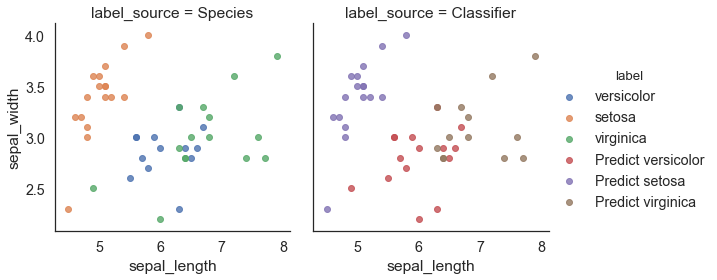

In [35]:
comparePlot(df_iris_test,"species","predicted_rf_tree")

We can also check __feature importance__ as dumped by the model.

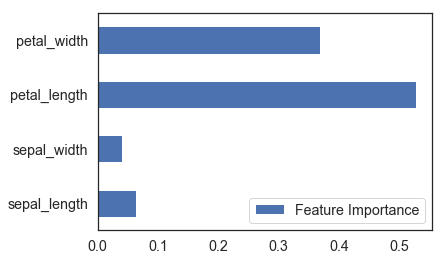

In [36]:
# Check feature importance
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=df_iris_train.columns[:4]).plot(kind='barh')

## Tuning the model
The model paramters are called _hyperparameters_.  Setting them to appropriate values and running the model experiment again can be time-consuming, so we have a technique called cross-validation to help with this.

From http://scikit-learn.org/stable/modules/cross_validation.html:

> When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

> However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

> A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

> A model is trained using  of the folds as training data;
the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

To do this, we first set up a parameter grid with the lists of paramters we want to try:

In [37]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25],
                 'max_depth': [2, 5, 7, 9],
             }

In [38]:
from sklearn.model_selection import GridSearchCV

We now run the cross-validation on the classifier:

In [39]:
grid_clf = GridSearchCV(rf_model, param_grid, cv=10)
grid_clf.fit(df_iris_train.ix[:,:4],df_iris_train.species)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 15, 20, 25], 'max_depth': [2, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

and extract the best model:

In [40]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [41]:
grid_clf.best_params_

{'max_depth': 5, 'n_estimators': 25}

In case we want the details of the accuracy of each setting:

In [42]:
grid_clf.cv_results_

{'mean_fit_time': array([0.00593741, 0.00777659, 0.01176982, 0.01357851, 0.01822155,
        0.00479212, 0.00807571, 0.01158531, 0.01541073, 0.01909678,
        0.00568216, 0.00935433, 0.01187251, 0.01495006, 0.01922729,
        0.00512123, 0.00835514, 0.01200347, 0.01582711, 0.01838651]),
 'std_fit_time': array([0.00160212, 0.00116937, 0.00144785, 0.00137087, 0.00145542,
        0.00051348, 0.00058112, 0.00114235, 0.00107063, 0.00187201,
        0.00047241, 0.00075798, 0.00042625, 0.00153135, 0.00098517,
        0.00039885, 0.00084964, 0.00123363, 0.00099628, 0.0012187 ]),
 'mean_score_time': array([0.00137684, 0.00136535, 0.00187204, 0.00198734, 0.00258398,
        0.00126565, 0.00147929, 0.00167711, 0.00211101, 0.00247734,
        0.00139627, 0.00168095, 0.00183609, 0.00211432, 0.00244777,
        0.001177  , 0.00160642, 0.00187292, 0.00210261, 0.00258925]),
 'std_score_time': array([0.00039631, 0.00019308, 0.00043686, 0.00028944, 0.00044943,
        0.00029614, 0.00019981, 0.000138

# 3. Naive Bayes

## 3.1 Train a Naive Bayes Classifier

We will first explore using Gaussian Naive Bayes model to classify irises into either "setosa" or "not setosa".

When you train a classifier, you need to think about the following three basic questions:
- What is the prediction objective?
- What are the possible classes?
- What are the features?

In this example, the answers to the above questions are:
- To predict whether an iris instance is setosa or not.
- Two possible classes: "setosa" and "not setosa".
- Features: 
  - petal_length only (for the demonstration)
  - petal_length and petal_width (for the exercise)

### <font color="magenta">Question 3:</font>
Construct the class labels
create a new column called 'is_setosa' that's set to 'setosa' if the species is setosa and 'not_setosa' 
if it's not.


In [50]:
# Your code here
df_iris['is_setosa'] = np.where(df_iris.species == 'setosa','setosa', 'not_setosa' )
df_iris_train, df_iris_test = train_test_split(df_iris, test_size = 0.3)
df_iris.sample(2)

,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
79,5.7,2.6,3.5,1.0,versicolor,not_setosa
109,7.2,3.6,6.1,2.5,virginica,not_setosa


With the class labels ready, let's build a Naive Bayes model. We start with a model that takes only one feature, sepal_length.

In [51]:
# train the model
gnb_model = sknb.GaussianNB()
# given sepal length, predict if setosa
gnb_model.fit(df_iris_train[['sepal_length']],df_iris_train['is_setosa'])

GaussianNB(priors=None, var_smoothing=1e-09)

Now we use the model to make predictions on the test dataset.

In [52]:
# test the model
y_pred = gnb_model.predict(df_iris_test[['sepal_length']])
df_iris_test['predicted_nb'] = y_pred

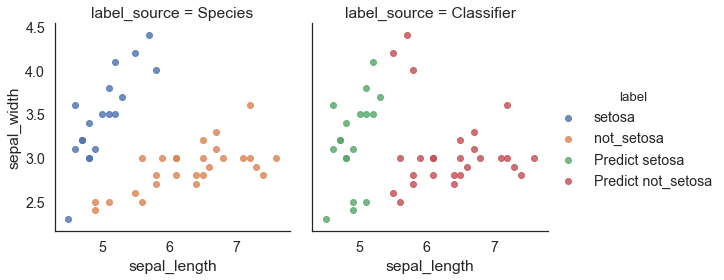

In [53]:
comparePlot(df_iris_test,"is_setosa","predicted_nb")

### <font color="magenta">Question 4: Repeat the above steps using petal_length and petal_width as the features.</font>

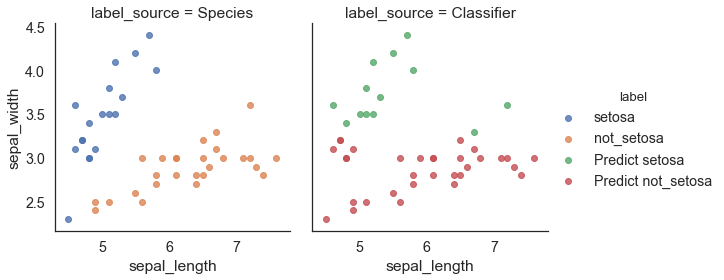

In [54]:
# train the model
gnb_model = sknb.GaussianNB()
# given sepal length, predict if setosa
gnb_model.fit(df_iris_train[['sepal_width']],df_iris_train['is_setosa'])

# test the model
y_pred = gnb_model.predict(df_iris_test[['sepal_width']])
df_iris_test['predicted_nb'] = y_pred
comparePlot(df_iris_test,"is_setosa","predicted_nb")

# BREAK

### <font color="magenta">Question 5: On Your Own</font>

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



https://github.com/madmashup/targeted-marketing-predictive-engine

Input variables

* age (numeric)
* job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
* marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
* education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
* default: has credit in default? (categorical: “no”, “yes”, “unknown”)
* housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
* loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
* contact: contact communication type (categorical: “cellular”, “telephone”)
* month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
* day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
* duration: last contact duration, in seconds (numeric). **Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model**
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
* emp.var.rate: employment variation rate — (numeric)
* cons.price.idx: consumer price index — (numeric)
* cons.conf.idx: consumer confidence index — (numeric)
* euribor3m: euribor 3 month rate — (numeric)
* nr.employed: number of employees — (numeric)

    Predict variable (desired target):

y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)
m
The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:


Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.



Here is a list of tasks that you need to complete:

1. Read the 'data/banking.csv' file into a dataframe and drop the "duration" column (see above)

2. The education column has multiple entries that are very similar. Let's group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

2. Use get_dummies() to "one-hot encode" the categorical variables (think carefully about how you handle drop_first).

1. Split the dataset into training and testing datasets.  We used 70-30 in the above examples; you might want to use the same or something different.  

2. Create a random forest classifier for ```y```.  Use all the features in the dataset. Use 10 decision trees and use 'entropy' as the criterion.  Fit the model to your training data set.

3. Add a column of predicted labels to the test dataset based on your predictions from the random forest classifier you fitted in the previous step.

4. Report the accuracy of your model.

5. Extract the feature importances from your model and plot them in a bar chart.  Identify the most important features in your model.

6. Tune your random forest model by varying the number of decision trees (n_estimators) and tree depth (max_depth).  Report the best hyperparameters and the accuracy obtained by using those hyperparameters.

7. Compare the results of your best random forest model with a (Gaussian) Naive Bayes model.  How much better is the random forest model?



In [55]:
import pandas as pd

In [94]:
banking = pd.read_csv('data/banking.csv')

In [95]:
banking.groupby('education').count()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,,,,,,,,,,
basic.4y,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176
basic.6y,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
basic.9y,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
high.school,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515
illiterate,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
professional.course,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243
university.degree,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168
unknown,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731


In [96]:
wrong = {'basic.4y', 'basic.6y', 'basic.9y'}
banking.education = ['basic' if x in wrong else x for x in banking.education]
banking.groupby('education').count()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,,,,,,,,,,
basic,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513,12513
high.school,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515
illiterate,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
professional.course,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243
university.degree,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168
unknown,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731


In [97]:
banking.drop('duration', inplace=True, axis=1)

In [98]:
data_final = pd.get_dummies(banking)
data_final.shape

(41188, 61)

In [99]:
data_final.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,1,0,0,0,0,0,1,0
2,28,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,...,0,0,0,0,1,0,0,0,0,1
3,39,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,1,0,0,0,0,0,1,0
4,55,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,...,0,0,1,0,0,0,0,0,0,1


**NOTE**: We need to use .get_dummies() to one-hot encode the data

In [100]:
# Add your code for data splitting (train_test_split)

# df_iris['is_setosa'] = np.where(df_iris.species == 'setosa','setosa', 'not_setosa' )
banking_train, banking_test = train_test_split(data_final, test_size = 0.3)
# df_iris.sample(2)

banking_train_dropy = banking_train.drop('y',axis=1)
banking_test_dropy = banking_test.drop('y',axis=1)

In [104]:
# build a random forest
# now do the predicting... use the same approach as you did in testing the Decision Tree Classifier above,
# but don't include the .sample() line
# this is testing the model 

rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')
rf_model.fit(banking_train_dropy,banking_train.y)

# now do the predicting... use the same approach as you did in testing the Decision Tree Classifier above,
# but don't include the .sample() line
# this is testing the model 
predicted_labels = rf_model.predict(banking_test_dropy)
banking_test['predicted_rf_tree'] = predicted_labels

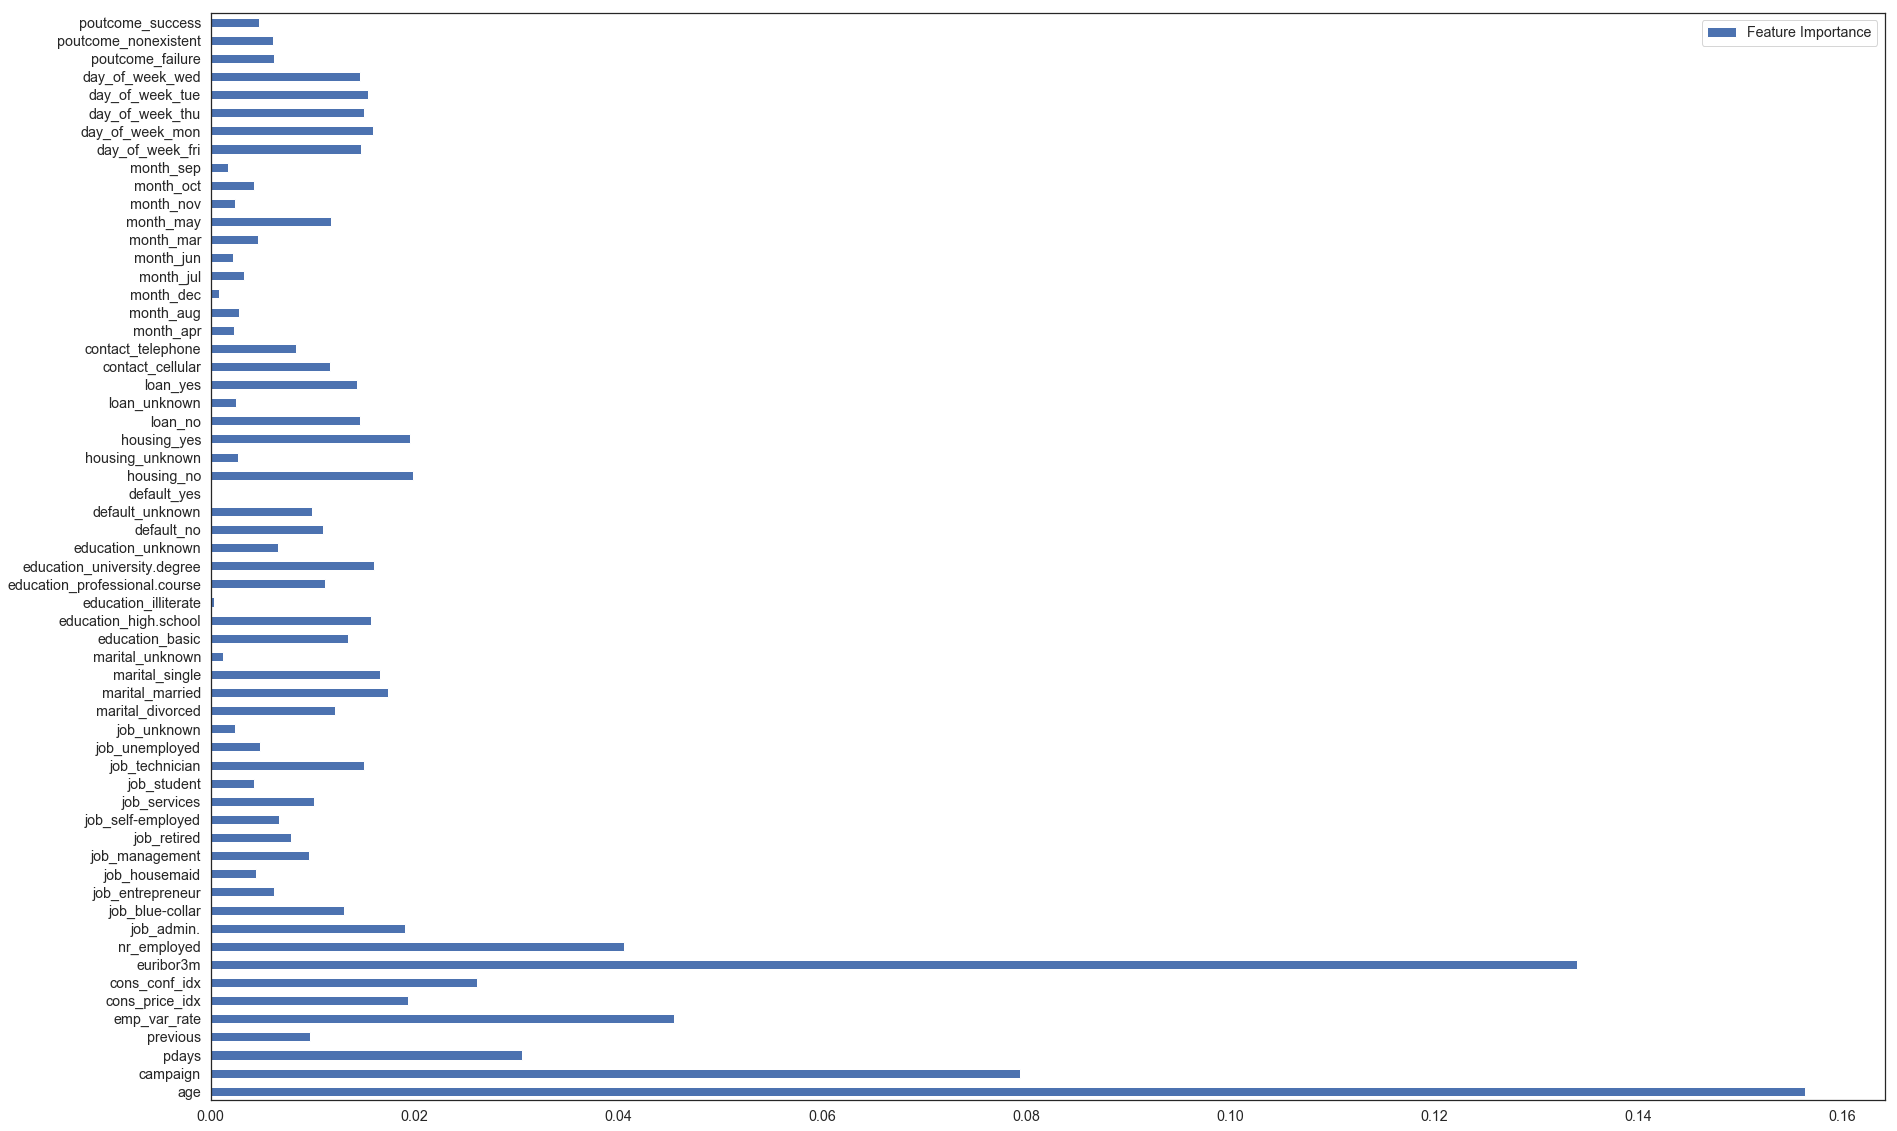

In [106]:
# Check feature importance
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=banking_train_dropy.columns).plot(kind='barh', figsize=(30,20))

In [108]:
# Model Selection and Comparison

param_grid = {
                 'n_estimators': [5, 10, 15, 20, 25],
                 'max_depth': [2, 5, 7, 9],
             }

grid_clf = GridSearchCV(rf_model, param_grid, cv=10)
grid_clf.fit(banking_train_dropy,banking_train.y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 15, 20, 25], 'max_depth': [2, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [110]:
grid_clf.best_params_

{'max_depth': 9, 'n_estimators': 20}

In [111]:
grid_clf.cv_results_

{'mean_fit_time': array([0.05321372, 0.08937712, 0.12904708, 0.16317699, 0.19487982,
        0.06785405, 0.12061017, 0.17462499, 0.21201911, 0.2708672 ,
        0.07683685, 0.14135375, 0.19458408, 0.25820692, 0.32908127,
        0.08824592, 0.16452065, 0.23099658, 0.29720447, 0.38914912]),
 'std_fit_time': array([0.00887353, 0.00429635, 0.01701041, 0.00651222, 0.00758091,
        0.00531152, 0.00448815, 0.00854117, 0.01329685, 0.01196303,
        0.00505768, 0.00936485, 0.00848934, 0.01618429, 0.02398951,
        0.00658314, 0.00635752, 0.01691771, 0.0160388 , 0.02392537]),
 'mean_score_time': array([0.00259814, 0.00397453, 0.00500705, 0.00535614, 0.00581405,
        0.0036485 , 0.00438888, 0.00509365, 0.00591195, 0.00802176,
        0.00357113, 0.00462053, 0.00634112, 0.00777824, 0.00816524,
        0.00347474, 0.00546424, 0.00707815, 0.0082114 , 0.00994496]),
 'std_score_time': array([0.00031595, 0.000751  , 0.00210124, 0.00076813, 0.00044699,
        0.00060976, 0.00105328, 0.000706

In [116]:
grid_clf.cv_results_['mean_test_score']

array([0.889598  , 0.88866151, 0.88769033, 0.88779439, 0.88779439,
       0.89823454, 0.8980958 , 0.89889355, 0.8985467 , 0.89868544,
       0.89702057, 0.89896292, 0.89962193, 0.89882418, 0.89920572,
       0.89851202, 0.89937914, 0.89806111, 0.90045437, 0.8999341 ])

In [117]:
grid_clf.cv_results_['mean_test_score'].max()

0.9004543720301065

The best random forest model has the 'max_depth': 9, 'n_estimators': 20, which is also the same position for specific parameter 9 and 20. And the accuracy is around 90%. 